<a href="https://colab.research.google.com/github/geoffwoollard/learn_cryoem_math/blob/master/nb/stochastic_gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Motivation

Methods such as (Nguyen et al., 2022) take gradients thorugh a more complex image formation model, which involves random sampling of noise. They use methods that reference stochastic computation graphs in (Schulman et al., 2015). 

Here we work out the five examples in Figure 1 of (Schulman et al 2015) in more detail, in order to demystify and build intuition.

Nguyen, N., Liang, F., Engel, D., Bohak, C., Wonka, P., Ropinski, T., & Viola, I. (2022). Differentiable Electron Microscopy Simulation: Methods and Applications for Visualization, (1), 1–22.

Schulman, J., Heess, N., Weber, T., & Abbeel, P. (2015). Gradient estimation using stochastic computation graphs. Advances in Neural Information Processing Systems, 2015-Janua, 3528–3536.



<img src='https://d3i71xaburhd42.cloudfront.net/438bb3d46e72b177ed1c9b7cd2c11a045644a1f4/4-Figure1-1.png'>

# Analytic work

1. Derive the Objective analytically, by assuming some simple relationship in the linking functions
  * Express the expectation as an integral
  * Do the integral analytically, to get a function of $\theta$
  * Take the derivative w.r.t. $\theta$
2. Code up Gradient estimator, based on your assumptions of the stochastic distributions and deterministic functions
3. Compare 1 and 2.

We can also derive an expression for the variance of the gradient estimator i.t.o the analytic parameters in the problem, $\nabla_\theta$, where $\partial_\theta E_p[f] = E_p[\nabla_\theta]$
* Take the gradient estimator as a function of analytic parameters (assume stochastic distributions and deterministic functions)
* Find 
$$V_p[\nabla_\theta] = E_p[(\nabla_\theta - \hat \nabla_\theta)^2]$$, where $\hat \nabla_\theta$ = $E_p[\nabla_\theta] = \partial_\theta E_p[f]$ can be done analytically.

# imports

In [9]:
import torch
from torch import tensor
import torch.distributions as dist

import pandas as pd

# 1
$$
x = a\theta \\
y \sim N[x,\sigma] \\
f = y
$$

Gradient Estimator
$$\nabla_\theta = a$$

Variance of Gradient Estimator
$$V[\nabla_\theta] = a^2(\frac{a^2\theta^2}{\sigma^2} + 2)$$

Note that the variance of the gradient estimator, i.e. "variance of the gradient" during training, is minimized with small $a, \theta$ and large $\sigma$.

In [145]:
def pp_1(theta,a,sigma):
  x = a*theta
  dist_y = dist.Normal(x,sigma)
  y = dist_y.sample()
  f = y
  score = a*(y-a*theta)*y/sigma**2
  return f,score

theta = tensor(10.)
sigma = 10
a = 10
n_samples = 10000
fs = []
scores = []
for sample in range(n_samples):
  f, score = pp_1(theta,a,sigma)
  fs.append(f.item())
  scores.append(score.item())

In [142]:
df = pd.DataFrame({'score':scores,
              'f':fs})

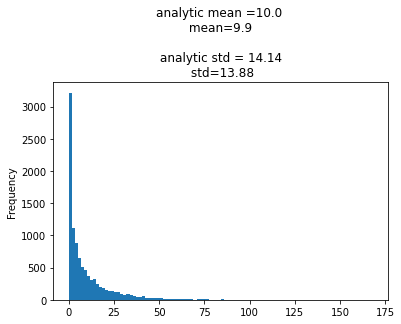

In [144]:
analytic_mean=a
analytic_std = (a**2/sigma**2*(a**2*theta**2+2*sigma**2))**0.5
mean = df['score'].mean()
std = df['score'].std()
title = 'analytic mean ={:1.1f} \n mean={:1.1f} \n\n analytic std = {:1.2f} \n std={:1.2f}'.format(analytic_mean,mean,analytic_std,std)
df['score'].plot.hist(bins=100, title=title)

# 2
$$
x \sim N[\theta,\sigma] \\
y = ax \\
f=y
$$

In [64]:
def pp_2(theta,a,sigma):
  dist_x = dist.Normal(theta,sigma)
  x = dist_x.sample()
  y = a*x
  f = y
  score = a*x*(x-theta)/sigma**2
  return f,score

theta = tensor(5.)
a = 2
sigma = 1
n_samples = 10000
fs = []
scores = []
for sample in range(n_samples):
  f, score = pp_2(theta,a,sigma)
  fs.append(f.item())
  scores.append(score.item())

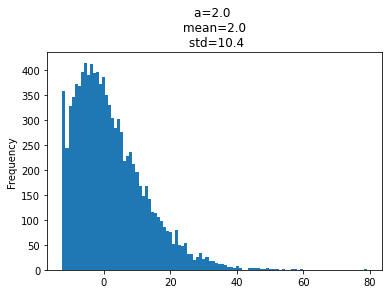

In [65]:
df = pd.DataFrame({'score':scores,
              'f':fs})

analytic=a
mean = df['score'].mean()
std = df['score'].std()
title = 'analytic={:1.1f} \n mean={:1.1f} \n std={:1.1f}'.format(analytic,mean,std)
df['score'].plot.hist(bins=100, title=title)

# 3

$$
x \sim N[\theta,\sigma]
y \sim N[x,\sigma]]
f = y
$$

In [100]:
def pp_3(theta,sigma):
  dist_x = dist.Normal(theta,sigma)
  x = dist_x.sample()
  dist_y = dist.Normal(x,sigma)
  y = dist_y.sample()
  f = y
  score = y*(x-theta)/sigma**2
  return f,score

theta = tensor(3.)
sigma = 1.
n_samples = 10000
fs = []
scores = []
for sample in range(n_samples):
  f, score = pp_3(theta,sigma)
  fs.append(f.item())
  scores.append(score.item())

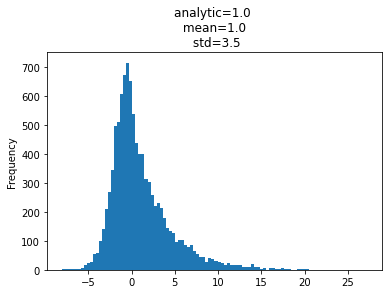

In [101]:
df = pd.DataFrame({'score':scores,
              'f':fs})

mean = df['score'].mean()
std = df['score'].std()
analytic = 1
title = 'analytic={:1.1f} \n mean={:1.1f} \n std={:1.1f}'.format(analytic,mean,std)
df['score'].plot.hist(bins=100, title=title)

# 4

$x \sim N[\theta,\sigma]$

$y = a\theta$ # note the order of x and y doensn't matter here

$f = y+x$

In [129]:
def pp_4(theta,sigma,a):
  dist_x = dist.Normal(theta,sigma)
  x = dist_x.sample()
  y = a*theta
  f = y + x
  score = f*(x-theta)/sigma**2 + a
  return f,score

theta = tensor(3.)
sigma = 1.
a=1
n_samples = 10000
fs = []
scores = []
for sample in range(n_samples):
  f, score = pp_4(theta,sigma,a)
  fs.append(f.item())
  scores.append(score.item())

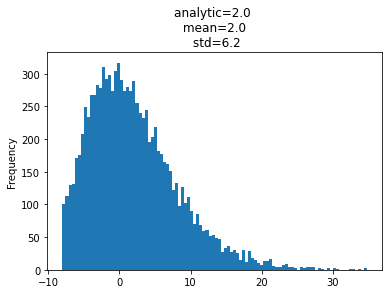

In [130]:
df = pd.DataFrame({'score':scores,
              'f':fs})

mean = df['score'].mean()
std = df['score'].std()
analytic = 1+a
title = 'analytic={:1.1f} \n mean={:1.1f} \n std={:1.1f}'.format(analytic,mean,std)
df['score'].plot.hist(bins=100, title=title)

# 5

$$
x_1 \sim N[\theta+x_0,\sigma] \\
x_2 \sim N[\theta+x_1,\sigma] \\
f_1 = x_1 \\
f_2 = x_2
$$

In [126]:
def pp_5(theta,x0,sigma):
  dist_x1 = dist.Normal(theta+x0,sigma)
  x1 = dist_x1.sample()
  dist_x2 = dist.Normal(theta+x1,sigma)
  x2 = dist_x2.sample()
  f1 = x1
  f2 = x2
  score = ((x1-(theta+x0))*(f1+f2) + (x2-(theta+x1))*x2)/sigma**2 
  return f,score

theta = tensor(0.75)
sigma = 7.
x0=0.5
n_samples = 10000
fs = []
scores = []
for sample in range(n_samples):
  f, score = pp_5(theta,x0,sigma)
  fs.append(f.item())
  scores.append(score.item())

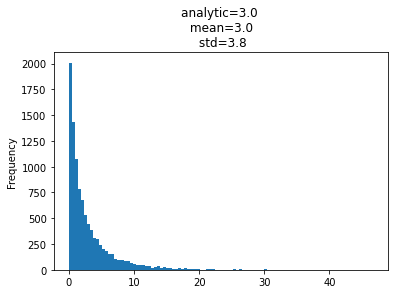

In [127]:
df = pd.DataFrame({'score':scores,
              'f':fs})

mean = df['score'].mean()
std = df['score'].std()
analytic = 3
title = 'analytic={:1.1f} \n mean={:1.1f} \n std={:1.1f}'.format(analytic,mean,std)
df['score'].plot.hist(bins=100, title=title)

We can also derive an expression for the variance of the gradient estimator i.t.o the analytic parameters in the problem, $\nabla_\theta$, where $\partial_\theta E_p[f] = E_p[\nabla_\theta]$
* Take the gradient estimator as a function of analytic parameters (assume stochastic distributions and deterministic functions)
* Find 
$$V_p[\nabla_\theta] = E_p[(\nabla_\theta - \hat \nabla_\theta)^2]$$, where $\hat \nabla_\theta$ = $E_p[\nabla_\theta] = \partial_\theta E_p[f]$ can be done analytically.

1. $Var[\nabla_\theta] = a(\frac{a^2\theta^2}{\sigma^2} + 2)$